<a href="https://colab.research.google.com/github/kcw0331/Fashion-Mnist/blob/main/%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2020220071_%EA%B9%80%EC%B0%BD%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion Mnist**

### **맥 락**
- Fashion-MNIST는 Zalando의 기사 이미지 데이터 세트이며, 60,000개의 예제로 구성된 교육 세트와 10,000개의 예제로 구성된 테스트 세트입니다. 각 예제는 10개 클래스의 레이블과 연결된 28x28 회색 이미지입니다. Zalando는 Fashion-MNIST가 기계 학습 알고리즘을 벤치마킹하기 위한 원래 MNIST 데이터 세트의 직접 drop-in 대체 역할을 할 것입니다. 교육 및 테스트 분할의 동일한 이미지 크기와 구조를 공유합니다.

### **컨텐츠**
- 각 이미지는 높이가 28픽셀이고 너비가 28픽셀이며 총 784픽셀입니다. 각 픽셀에는 하나의 픽셀 값이 연결되어 해당 픽셀의 밝기 또는 어두움을 나타내며, 숫자가 높을수록 진하다는 의미입니다. 이 픽셀 값은 0에서 255 사이의 정수입니다. 교육 및 테스트 데이터 세트에는 785개의 열이 있습니다. 첫 번째 열은 클래스 레이블로 구성되며 의류 품목을 나타냅니다. 나머지 열에는 연결된 이미지의 픽셀 값이 포함됩니다.

- 이미지에서 픽셀을 찾으려면 x를 x = i * 28 + j로 분해했다고 가정하였습니다. 여기서 i와 j는 0과 27 사이의 정수입니다. 픽셀은 28 x 28 행렬의 행 i 및 열 j에 있습니다. 예를 들어, 픽셀 31은 아래 ASCII 다이어그램과 같이 왼쪽에서 네 번째 열에 있는 픽셀과 위쪽의 두 번째 행을 나타냅니다.

### **라 벨**
  - 각각의 training과 test 예제는 다음 labels들이 한개씩 할당되어있습니다.
    - 0 T-shirt/top
    - 1 Trouser
 - 2 Pullover
 - 3 Dress
 - 4 Coat
 - 5 Sandal
 - 6 Shirt
 - 7 Sneaker
 - 8 Bag
 - 9 Ankle boot

### **TL;DR**
  - 각 행은 분리된 이미지입니다.
  - 첫번째 열은 클래스 라벨입니다.
  - Remaining 열들은 픽셀의 개수들입니다.(Total = 784)
  - 각각의 값은 픽셀의 darkness입니다. (1에서 255)

In [ ]:
import tensorflow
tensorflow.keras.__version__  

'2.5.0'

  - tensorflow의 버전을 확인해 줍니다.
  - 현재의 tensorflow의 버전이 2.5.0이라는 것을 알 수 있습니다.

## **1. Fashion Mnist의 데이터 구축 및 데이터 확인을 해줍니다.**


In [ ]:
import pandas as pd #pandas를 사용하기 위해 pandas를 불러와 줍니다.
import numpy as np  #numpy을 사용하기 위해 numpy을 불러와 줍니다.
import matplotlib.pyplot as plt  #이미지를 출력해주기 위해서 matplotlib에서 plt을 가지고 와줍니다.
from tensorflow.keras import utils #utils을 사용하기 위해서 tensorflow에서 utils을 가지고 와줍니다.

  - Fashion Mnist의 데이터를 돌릴 때, 필요한 패키지들을 불러와 줍니다.
    - **Pandas**는 쉽고 직관적인 관계형 또는 분류된 데이터로 작업 할 수 있도록 설계된 빠르고 유연하며 표현이 풍부한 데이터 구조를 제공하는 Python 패키지입니다.
    - **Numpy**는 Python에서 벡터, 행렬 등 수치 연산을 수행하는 선형대수(Linear algebra) 라이브러리입니다. 선형대수 관련 수치 연산을 지원하고 내부적으로는 C로 구현되어 있어 연산이 빠른 속도로 수행됩니다. 또한 Scipy와 함께 사용하면 공학용 소프트웨어인 MATLAB에 버금가는 기능을 지원한다고 알려져 있습니다.
    - **pyplot** 모듈의 각각의 함수를 사용하여 그래프를 만들고 변화를 줄 수 있습니다. 예를 들어, 그래프 영역을 만들고, 몇 개의 선을 표현하고, 레이블로 꾸미는 등의 일을 할 수 있습니다.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist  #fashion_mnist를 불러와 줍니다.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  
#fashion_mnist에서 train_images, train_labels, test_images, test_labels를 불러옵니다.

4423680/4422102 [==============================] - 0s 0us/step


  - Fashion Mnist의 데이터를 돌릴 때, 필요한 Fashion_Mnist의 데이터를 tensorflow에서 가지고 와줍니다.
    - tensorflow에서 **train_images, train_labels, test_images, test_labels**을 가지고 온 것을 확인할 수 있습니다.

### **<Fashion_Mnist의 train의 구조가 어떻게 되어있는지를 파악해줍니다.>**

In [ ]:
train_images[:2,:,:]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

  - 처음으로 train_images가 어떻게 구성이 되어있는지를 확인해 줍니다.
    - **train_images[:2 , : , :]**은 3개의 array가 되는 것을 확인할 수 있습니다.

In [ ]:
train_images.shape

(60000, 28, 28)

- train_images.shape을 통해서 train data안에 60000개와 28x28픽셀이 있는 것을 shape을 통해 알 수 있습니다.

In [ ]:
len(train_labels)

60000

- len(train_labels)을 통해서 train_labels의 크기가 60000개라는 것을 알 수 있습니다.

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

- train_labels을 해줘서 0~9까지의 숫자가 나오게되고 dtype이 integer를 가지고 8비트라는 것을 알 수 있습니다.

### **<Fashion_Mnist의 test의 구조가 어떻게 되어있는지를 파악해줍니다.>**

In [ ]:
test_images.shape  

(10000, 28, 28)

  - test_images가 어떻게 구성이 되어있는지 확인을 해줍니다.
    - train_images.shape을 통해서 train data안에 10,000개와 28x28픽셀이 있는 것을 shape을 통해 알 수 있습니다.

In [ ]:
len(test_labels)

10000

- len(test_labels)을 통해서 test_labels의 크기가 10,000개라는 것을 알 수 있습니다.

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

- test_labels을 해줘서 0~9까지의 숫자가 나오게되고 dtype이 integer를 가지고 8비트라는 것을 알 수 있습니다.

## **2. Fashion Mnist의 실제 데이터 Plot 출력해주었습니다.**

  - plt의 imshow를 통해서 그림을 Plot해 주었습니다. 첫번째는 컬러로 출력을 하였으며 두번째는 흑백으로 출력을 하여 Plot이 어떻게 생겼는지 확인을 하였습니다.

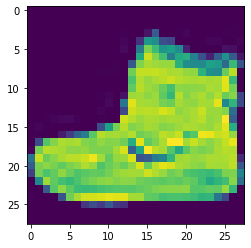

In [ ]:
plt.imshow(train_images[0])

  - train_image[0]를 Plot을 해줍니다. Plot을 한 걸로 보아서는 운동화가 Plot된 것을 볼 수 있습니다.


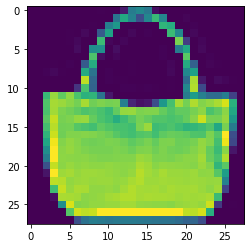

In [ ]:
plt.imshow(train_images[100])

  - train_image[100]를 Plot을 해줍니다. Plot을 한 걸로 보아서는 핸드백이 Plot된 것을 볼 수 있습니다.

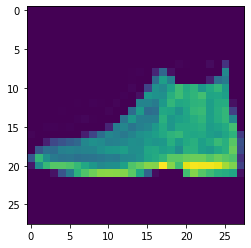

In [ ]:
plt.imshow(test_images[0])

  - test_image[0]를 Plot을 해줍니다. Plot을 한 걸로 보아서는 구두가 Plot된 것을 볼 수 있습니다.

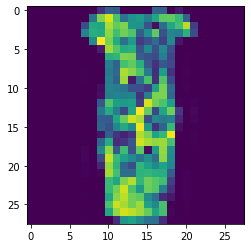

In [ ]:
plt.imshow(test_images[100])

  - test_image[100]를 Plot을 해줍니다. Plot을 한 걸로 보아서는 원피스가 Plot된 것을 볼 수 있습니다.

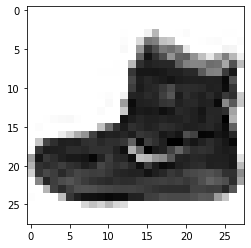

In [ ]:
digit = train_images[0]

plt.imshow(digit, cmap=plt.cm.binary)   #matplotlib을 간단하게 plt로 바꾸어주고 plt.show를 사용하여 이미지를 출력해 주었습니다.
plt.show()

  - train_images[0]을 흑백으로 해서 결과를 출력해주었습니다. Plot을 한 걸로 보아서는 운동화가 Plot된 것을 볼 수 있습니다.

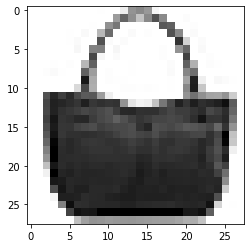

In [ ]:
digit = train_images[100]

plt.imshow(digit, cmap=plt.cm.binary)   #matplotlib을 간단하게 plt로 바꾸어주고 plt.show를 사용하여 이미지를 출력해 주었습니다.
plt.show()

  - train_images[100]을 흑백으로 해서 결과를 출력해주었습니다. Plot을 한 걸로 보아서는 핸드백이 Plot된 것을 볼 수 있습니다.

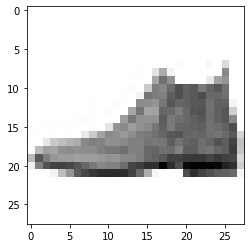

In [ ]:
digit = test_images[0]

plt.imshow(digit, cmap=plt.cm.binary)   #matplotlib을 간단하게 plt로 바꾸어주고 plt.show를 사용하여 이미지를 출력해 주었습니다.
plt.show()

  - test_images[0]을 흑백으로 해서 결과를 출력해주었습니다. Plot을 한 걸로 보아서는 구두가 Plot된 것을 볼 수 있습니다.

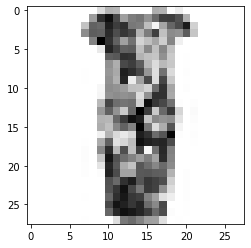

In [ ]:
digit = test_images[100]

plt.imshow(digit, cmap=plt.cm.binary)   #matplotlib을 간단하게 plt로 바꾸어주고 plt.show를 사용하여 이미지를 출력해 주었습니다.
plt.show()

  - test_images[100]을 흑백으로 해서 결과를 출력해주었습니다. Plot을 한 걸로 보아서는 원피스가 Plot된 것을 볼 수 있습니다.

## **3. Fashion_Mnist의 Models과 Layer를 만들어 주었습니다.**

In [ ]:
from tensorflow.keras import models        #tensorflow에서 models을 가지고 옵니다.
from tensorflow.keras import layers        #tensorflow에서 layers를 가지고 옵니다.

model = models.Sequential()    #models에서 Sequential을 가지고와서 층을 만들어 주었습니다.
model.add(layers.Conv2D(32, (3, 3), padding = "valid", activation='relu', input_shape=(28, 28, 1))) #그리고 여기에서 부터 convnet 레이어를 3개를 달아 두었습니다.
model.add(layers.MaxPooling2D((2, 2))) #그리고 convnet 가운데에 MaxPooling을 통해서 Pooling을 해 두었습니다.
model.add(layers.Conv2D(64, (3, 3),  padding = "valid", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),  padding = "valid", activation='relu')) 

- input_shape이 28 x 28이여서 (28, 28, 1)을 해줍니다.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


  - model.summary()를 통해 sequential Model을 확인해 보았습니다.
    - **첫번째 Layer**는 conv2가 되어있고 Shape은 (None, 26, 26, 32)이며 Param은 320으로 되어있는 것을 볼 수 있습니다.
    - **두번째 Layer**는 Max_Pooling2d로 되어있으며, Shape은 (None, 13, 13, 32)이며 Max_Pooling을 하였기 때문에 첫번째 Layer에서 26이 였던게 반으로 줄어서 13으로 되어 있는 것을 확인 할 수 있으며 Param은 0으로 되어 있는 것을 볼 수 있습니다.
    - **세번째 Layer**는 conv2_1가 되어있고 Shape은 (None, 11, 11, 64)이며 Param은 18496으로 되어있는 것을 볼 수 있습니다.
    - **네번째 Layer**는 Max_Pooling2d_1로 되어있으며, Shape은 (None, 5, 5, 64)이며 Max_Pooling을 하였기 때문에 첫번째 Layer에서 11이 였던게 반으로 줄어서 5으로 되어 있는 것을 확인 할 수 있으며 Param은 0으로 되어 있는 것을 볼 수 있습니다.
    - **다섯번째 Layer**는 conv2d_2가 되어있고 Shape은 (Nonve, 3, 3, 64)이며 Param은 36928로 되어 있는 것을 볼 수 있습니다.

  - 그리고 Total params는 55,744로 되어 있습니다.

In [ ]:
model.add(layers.Flatten())   
model.add(layers.Dense(30, activation='relu')) 
model.add(layers.Dense(10, activation='softmax')) 

- Layers를 Flatten 해주었습니다.
- Dense Layer에서는 30으로 하고 activation은 relu를 사용하였습니다.
- Dense Layer에서는 30으로 하고 activation은 softmax를 사용하였습니다

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                1

- 다시 model.summary를 해주게 되면, Flatten Layer, Dense Layer, desne_1 Layer가 추가 된 것을 볼 수 있습니다.
  - **Flatten Layer**은 Shape이 (None, 576)이며, Param은 0이라는 것을 알 수 있습니다.
  - **Dense Layer**는 Shape이 (None, 30)이며, Param은 17310으로 되었다는 것을 알 수 있습니다.
  - **Dense_1 Layer**는 Shape이 (None, 10)이며, Param은 310으로 되었다는 것을 알 수 있습니다.
- 그리고 **Total params**도 **55,744**에서 **73,364**로 바뀌게 되었다는 것을 알 수 있었습니다.

In [ ]:
train_images.shape

(60000, 28, 28)

- **train_images.shape**이 60,000이고 가로가 28 세로가 28이라는 것을 알 수 있습니다.

In [ ]:
import numpy as np  
np.max(train_images)

255

- **train_images의 max**가 되는 것을 보았을 때, 255가 되는 것을 확인해 줄 수 있습니다. 
- 이것을 해주는 이유는 255로 나누어 주어야 하는데 실제 값이 255가 되는지 확인해 주기 위해 출력을 하였습니다.

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))  #여기에서는 28이 가로, 28이 세로, 그리고 1은 채널이고 원래 RGB는 3인데, 여기에서는 흑백이라서 1이 된다는 것을 알 수 있습니다. 
train_images = train_images.astype('float32') / 255 #여기에서는 255로 나누어서 0에서 1의 값이 되도록 표준화를 시켜줍니다.

test_images = test_images.reshape((10000, 28, 28, 1)) #test도 train과 마찬가지로 같은 방법으로 해줍니다.
test_images = test_images.astype('float32') / 255

- **train_images**와 **test_images** 둘 다 같은 방법을 취해줍니다.
  - 28이 가로, 28이 세로, 그리고 1은 채널이고 원래 RGB는 3인데, 흑백이라서 1이 된다는 것을 알 수 있습니다. 

  - 255로 나누어서 0에서 1의 값이 되도록 표준화를 시켜줍니다.

In [ ]:
import numpy as np
np.max(train_images)

1.0

- 위에서 train_images의 max가 255였는데, 여기에서는 255로 누어 주었기 때문에, max값이 1이 되는 것을 확인할 수 있습니다.

In [ ]:
train_images.shape

(60000, 28, 28, 1)

- train_images.sahpe은 60,000이고 가로 28, 세로28 그리고 채널이 1이 되는 것을 볼 수 있습니다.
- 위에서 train_images.shape을 하였을 때는 채널 1이 나오지 않았는 데, 위의 코드에서 reshape을 해주어 채널 1이 나오는 것을 확인 할 수 있습니다.

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
train_labels[:5] 

array([9, 0, 0, 3, 0], dtype=uint8)

- 현재 train_labels을 보았을 때, 0 부터 9까지의 수 중 하나가 나오는 것을 볼 수 있습니다. 그리고 datatype은 uint8이라는 것을 확인할 수 있습니다.

In [ ]:
import numpy as np
np.max(test_images)

1.0

- 위에서 test_images의 max가 255였는데, 여기에서는 255로 누어 주었기 때문에, max값이 1이 되는 것을 확인할 수 있습니다.

In [ ]:
test_images.shape

(10000, 28, 28, 1)

  - test_images.sahpe은 60,000이고 가로 28, 세로28 그리고 채널이 1이 되는 것을 볼 수 있습니다.
  - 위에서 test_images.shape을 하였을 때는 채널 1이 나오지 않았는 데, 위의 코드에서 reshape을 해주어 채널 1이 나오는 것을 확인 할 수 있습니다.

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
test_labels[:5] 

array([9, 2, 1, 1, 6], dtype=uint8)

- 현재 test_labels을 보았을 때, 0 부터 9까지의 수 중 하나가 나오는 것을 볼 수 있습니다. 그리고 datatype은 uint8이라는 것을 확인할 수 있습니다.

In [ ]:
from tensorflow.keras.utils import to_categorical

- **to_categorical**을 사용하기 위해 **tensorflow.keras.utils**에서 가지고 와줍니다.
  - **Keras.utils.np_utils**패키지에 있는 **to_categorical**함수는 바로 **One-hot**인코딩을 해주는 함수입니다. **One-hot인코딩이란** 10진수의 정수 형식을 특수한 2진수의 binary 형식으로 바꾸어주는 방법입니다.
그래서 parameter로 값에 크기만큼 0으로 된 배열을 만들고, parameter 값 위치에만 1을 넣어줍니다.

In [ ]:
train_labels = to_categorical(train_labels)  
test_labels = to_categorical(test_labels)

- train_labels과 test_labels에 One_hot_encoding을 사용하기 위해서 categorical로 바꾸어 줍니다.

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- 위에서 train_labels이 0 부터 9까지의 숫자 중 하나가 나오는 것을 볼 수 있었는데, one_hot_encoding을 하용하여 0과 1이 array로 출력되는 것을 확인 할 수 있습니다. 그리고 datatype도 unit8에서 float32로 바꾼것을 볼 수 있습니다.

In [ ]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

- 위에서 test_labels이 0 부터 9까지의 숫자 중 하나가 나오는 것을 볼 수 있었는데, one_hot_encoding을 하용하여 0과 1이 array로 출력되는 것을 확인 할 수 있습니다. 그리고 datatype도 unit8에서 float32로 바꾼것을 볼 수 있습니다.

## **4. Fashion_Mnist의 Model Compile과 Plot을 그려주었습니다.**

In [ ]:
model.compile(optimizer='rmsprop',            #optimizer는 rmsprop를 사용하였습니다.
              loss='categorical_crossentropy',  #그리고 loss를 categorical_crossentropy를 해주었습니다.
              metrics=['accuracy'])            #metrics에 accuracy를 사용하였습니다.
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=30, batch_size=64, verbose=1)
#train_images와 trin_lables을 사용했으며, validation_data에는 test_images와 test_lables을 사용하였습니다. 그리고 epochs은 30으로 하였고, batch_size는 64로 하였고 verbose는 1로 하였습니다.
#그리고 history에 저장을 해두었습니다.

Epoch 1/30
938/938 [==============================] - 20s 5ms/step - loss: 0.5685 - accuracy: 0.7916 - val_loss: 0.4050 - val_accuracy: 0.8548
Epoch 2/30
938/938 [==============================] - 4s 5ms/step - loss: 0.3463 - accuracy: 0.8739 - val_loss: 0.3776 - val_accuracy: 0.8658
Epoch 3/30
938/938 [==============================] - 4s 5ms/step - loss: 0.2937 - accuracy: 0.8924 - val_loss: 0.3034 - val_accuracy: 0.8903
Epoch 4/30
938/938 [==============================] - 4s 5ms/step - loss: 0.2660 - accuracy: 0.9020 - val_loss: 0.2935 - val_accuracy: 0.8930
Epoch 5/30
938/938 [==============================] - 4s 5ms/step - loss: 0.2399 - accuracy: 0.9113 - val_loss: 0.3151 - val_accuracy: 0.8838
Epoch 6/30
938/938 [==============================] - 4s 5ms/step - loss: 0.2192 - accuracy: 0.9190 - val_loss: 0.2714 - val_accuracy: 0.9014
Epoch 7/30
938/938 [==============================] - 4s 5ms/step - loss: 0.2047 - accuracy: 0.9249 - val_loss: 0.2802 - val_accuracy: 0.9023
Epoch

- 위의 Model Compile을 실행 시켜 보았을 때, Epoch가 30이 되었을 때, loss는 0.0581가 되는 것을 확인 할 수 있고, accuracy는 0.9787가 되는 것을 확인 할 수 있습니다. 그리고 val_loss는 0.5993의 값을 가진다는 것을 확인 할 수 있으며, val_accuracy은 0.9073의 값을 가진다는 것을 확인 할 수 있습니다.


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5993 - accuracy: 0.9073


- test_loss와 test_accuracy도 실행해 줍니다. 
  - test의 loss가 0.5993이고, accuracy가 0.9073이 나오는 것을 확인 할 수 있습니다.


In [ ]:
print('test_accuracy:', test_acc)

test_accuracy: 0.9072999954223633


- test accuracy가 90%가 나온다는 것을 알 수 있습니다.

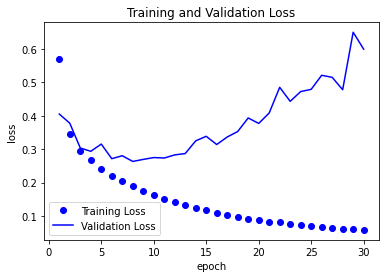

In [ ]:
#Plot을 사용해서 현재 Training과 Validation Loss가 어떻게 되는지 그려주었습니다.
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = (history.history['loss'])
val_loss = (history.history['val_loss'])

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

- Training and Validation loss를 하였을 때, Training loss는 0.0581로 낮은 값을 가진다는 것을 볼 수 있지만 Validation loss는 0.5993로 높은 값을 가진다는 것을 알 수 있습니다. 즉, Training loss는 잘 되었지만 Validation loss는 높은 값을 가지기 때문에 과적합 되었다는 것을 알 수 있습니다.

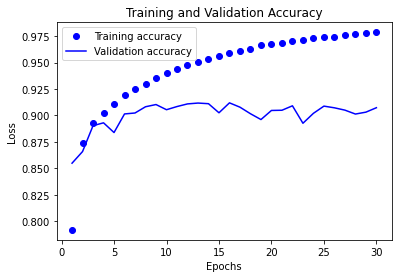

In [ ]:
#Plot을 사용해서 현재 Training과 Validation Accuracy가 어떻게 되는지 그려주었습니다.
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- Training and Validation Accuracy를 하였을 때, Training Accuracy의 값은0.9787로 높은 값을 보이는 반면에, Validation Accuracy의 값은 0.9073로 Training Accuracy의 값보다 낮은 값을 가진다는 것을 볼 수 있습니다. 즉, Training accuracy보다 Validation Accuracy가 낮은 값을 가지기 때문에 과적합이 되었다는 것을 알 수 있습니다. 따라서 이러한 과적합을 방지 하기 위해 다음 과정부터는 model을 바꾸어서 과적합이 되는 것을 방지 하고자 합니다.

## **5. Fashion_Mnist의 기존 모델을 Model1으로 성능을 향상시켜주고 Plot을 그려주었습니다.**

- 위에서 Model을 만들어서 Model을 Compile해본 결과 Training Loss는 0.0581로 낮은 값이 나오지만, Validation Loss는 0.5993로 높은 값이 나오며, Training Accuracy는 0.9787로 높은 값을 가지지만 Validation Accuracy는 0.9073로 Training Accuracy의 값보다 낮은 값을 가지기 때문에 과적합이 일어나는 것을 볼 수 있었습니다. 그래서 **5. Fashion_Mnist의 기존 모델을 Model1으로 성능을 향상시켜주고 Plot을 그려주었습니다.** 에서는 Model을 수정하고 Model을 Compile하여 과적합 되는 것을 방지하고자 합니다.

In [ ]:
from tensorflow.keras import models        #tensorflow에서 models을 가지고 옵니다.
from tensorflow.keras import layers        #tensorflow에서 layers를 가지고 옵니다.

model1 = models.Sequential()    #models에서 Sequential을 가지고와서 층을 만들어 주었습니다.

model1.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', #Conv2D를 사용하여 filters는 32로 해주고, kernel_size는 행을 5로 열을 5로 해줍니다.
                 activation ='relu', input_shape = (28,28,1)))
model1.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', #Conv2D를 사용하여 filters는 32로 해주고, kernel_size는 행을 5로 열을 5로 해줍니다.
                 activation ='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.25))


model1.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',  #Conv2D를 사용하여 filters는 64로 해주고, kernel_size는 행을 3로 열을 3로 해줍니다.
                 activation ='relu'))
model1.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',  #Conv2D를 사용하여 filters는 64로 해주고, kernel_size는 행을 3로 열을 3로 해줍니다.
                 activation ='relu'))

model1.add(layers.Conv2D(filters = 128, kernel_size = (1,1),padding = 'Same',  #Conv2D를 사용하여 filters는 128로 해주고, kernel_size는 행을 3로 열을 3로 해줍니다.
                 activation ='relu'))
model1.add(layers.Conv2D(filters = 128, kernel_size = (1,1),padding = 'Same',  #Conv2D를 사용하여 filters는 128로 해주고, kernel_size는 행을 3로 열을 3로 해줍니다.
                 activation ='relu'))

model1.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))) #MaxPooling2D를 사용하여 pool_size를 (2,2)로 하였으며, strides를 (2,2)로 하였습니다.
model1.add(layers.Dropout(0.25)) #Dropout과 같은 경우는 0.25로 하였습니다.


model1.add(layers.Flatten())  #Flatten을 시켜줬습니다.
model1.add(layers.Dense(64, activation = "relu"))   #Dense layer를 64로 해주고, activation을 relu로 하였습니다.
model1.add(layers.Dropout(0.5))    #Dropout을 0.5로 하였습니다.
model1.add(layers.Dense(10, activation = "softmax")) #Dense layer를 10로 해주고, activation을 softmax로 하였습니다.

- **첫번째 인자**에서 filters를 사용합니다.

- **두번째 인자**에서는 knernel_size를 사용합니다.

- **padding** : 경계를 처리해 주는 방법입니다.
  - ‘Same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일하게 해줍니다.

- **activation** : 활성화 함수를 설정해줍니다.
  - ‘linear’ : 디폴트 값이고, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력 됩니다.
  - ‘relu’ : rectifier 함수이고, 은닉층에 주로 사용됩니다.
  - ‘sigmoid’ : sigmoid 함수이고, 이진 분류 문제에서 출력층에 주로 사용됩니다.
  - ‘softmax’ : softmax 함수이고, 다중 클래스 분류 문제에서 출력층에 주로 사용됩니다.

- **Max-pooling** : 특정 영역에서 가장 큰 값을 샘플링하는 풀링 방식입니다.
  - pool_size : pool_size는 2×2 영역으로 하였습니다.
  - strides : 풀링필터를 이동시키는 간격이며, 여기에서는 (2,2)를 사용하였습니다.

- **Flatten** : Flatten 함수는  numpy의 함수로써, 여러 행렬의 함수를 하나의 행 또는 열로 변환을 해주는 함수입니다.

- **Dense** : Dense 함수는 입력과 출력을 모두 연결해줍니다. 이 예제에서는 activation을 relu와 softmax를 사용하였습니다.

- **Dropout** : Dropout 함수는 학습을 시킬 때 무작위로 뉴런을 '드롭아웃(=제외)'시키는 방법입니다. 

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)      

- **model1.summary()**를 통해 sequential_1 Model을 확인해 보았습니다.
그리고 **Total params**는 508,842로 되어 있습니다.

In [ ]:
model1.compile(optimizer='Adam',            #optimizer는 Adam를 사용하였습니다.
              loss='categorical_crossentropy',  #그리고 loss을 categorical_crossentropy를 하였습니다.
              metrics=['accuracy'])            #mertics를 accuracy로 하였습니다.
history = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=30, batch_size=64, verbose=1)
#여기에서는 이전에 실행했던 model에서 돌렸던 듯이 똑같이 epochs는 30으로 하였고 batch_size는 64로 하였으며, verbose는 1로 하였습니다.

Epoch 1/30
938/938 [==============================] - 8s 7ms/step - loss: 0.6829 - accuracy: 0.7509 - val_loss: 0.3790 - val_accuracy: 0.8551
Epoch 2/30
938/938 [==============================] - 6s 7ms/step - loss: 0.4469 - accuracy: 0.8393 - val_loss: 0.3287 - val_accuracy: 0.8790
Epoch 3/30
938/938 [==============================] - 6s 7ms/step - loss: 0.3925 - accuracy: 0.8575 - val_loss: 0.3110 - val_accuracy: 0.8873
Epoch 4/30
938/938 [==============================] - 6s 7ms/step - loss: 0.3595 - accuracy: 0.8698 - val_loss: 0.2832 - val_accuracy: 0.8959
Epoch 5/30
938/938 [==============================] - 6s 7ms/step - loss: 0.3356 - accuracy: 0.8777 - val_loss: 0.2833 - val_accuracy: 0.8982
Epoch 6/30
938/938 [==============================] - 6s 7ms/step - loss: 0.3148 - accuracy: 0.8869 - val_loss: 0.2647 - val_accuracy: 0.9049
Epoch 7/30
938/938 [==============================] - 6s 7ms/step - loss: 0.3006 - accuracy: 0.8906 - val_loss: 0.2415 - val_accuracy: 0.9108
Epoch 

- 위의 Model Compile을 실행 시켜 보았을 때, Epoch가 30이 되었을 때, loss는 0.1834가 되는 것을 확인 할 수 있고, accuracy는 0.9323가 되는 것을 확인 할 수 있습니다. 그리고 val_loss는 0.2409의 값을 가진다는 것을 확인 할 수 있으며, val_accuracy은 0.9258의 값을 가진다는 것을 확인 할 수 있습니다.

In [ ]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2409 - accuracy: 0.9258


- **test_loss**가 0.2409, **test_accuracy**가 0.9258의 값이 나온것을 확인할 수 있습니다.

In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9258000254631042


- **test_accuracy**의 값이 0.9258가 나온 것을 확인할 수 있습니다.

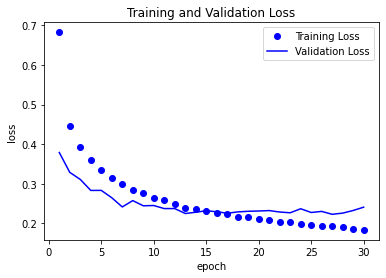

In [ ]:
#Plot을 사용해서 현재 Training과 Validation Loss가 어떻게 되는지 그려주었습니다.
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = (history.history['loss'])
val_loss = (history.history['val_loss'])

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

- Training and Validation Loss를 보았을 때, Training Loss는 0.1834의 값을 가지며 Validation Loss는 0.2409의 값을 가지는 것을 볼 수 있습니다.

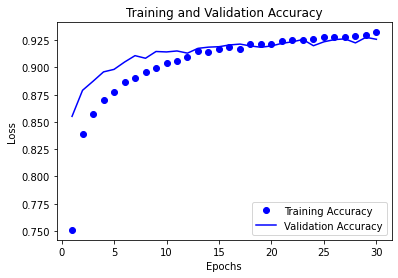

In [ ]:
#Plot을 사용해서 현재 Training과 Validation Accuracy가 어떻게 되는지 그려주었습니다.
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- Training and Validation Accuracy를 보았을 때, Training Accuracy는 0.9323의 값을 가지며, Validation Accuracy는 0.9258의 값을 가진다는 것을 볼 수 있습니다. 

## **6. Fashion_Mnist의 결 론.**

### -  Model을 Compile해본 결과 Training Loss는 0.0581로 낮은 값이 나오지만, Validation Loss는 0.5993로 높은 값이 나오며, Training Accuracy는 0.9787로 높은 값을 가지지만 Validation Accuracy는 0.9073로 Training Accuracy의 값보다 낮은 값을 가지기 때문에 과적합이 일어나는 것을 볼 수 있었습니다.

### -  따라서 Model을 수정한 Model1을 Compile해본 결과 Training Loss는 0.1834의 값이 나오고, Validation Loss는 0.2409의 값이 나오는 것을 알 수 있으며, Training Accuracy는 0.9323값을 가지며 Validation Accuracy는 0.9258의 값을 가진다는 것을 알 수 있습니다. 

### -  결과적으로 Model을 가지고 Compile을 하였을 때보다 Training Accuracy는 조금 낮은 값이 나오게 되지만 Training Loss, Validation Loss의 값은 둘 다 낮은 값을 가지며, Validation Accuracy는 좀 더 높은 값을 가지기 때문에 성능이 더 좋아진것을 확인 할 수 있으며, 과적합이 되던것이 없어진 것을 확인할 수 있었습니다.